In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import glob
from PIL import Image

%matplotlib inline

w, h = (60, 60)

def load_gray_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (w, h), interpolation = cv2.INTER_AREA) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def graytorgb(img):
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    return img

def loadfaces(prefix):
    ret = []
    for img_path in glob.glob('./faces/' + prefix + '*.jpg'):
        ret.append(load_gray_image(img_path))
    return ret

def subplot(imgs):
    plt.figure(figsize=(20,4))
    columns = 5
    for i, image in enumerate(imgs):
        plt.subplot(len(imgs) / columns + 1, columns, i + 1)
        plt.imshow(graytorgb(image))

def subplot_medias(imgs, titles):
    plt.figure(figsize=(20,6))
    columns = len(imgs)
    for i, image in enumerate(imgs):
        sub = plt.subplot(len(imgs) / columns + 1, columns, i + 1)
        sub.title.set_text(titles[i])
        plt.imshow(graytorgb(image))

def img_to_row(img):
    return img.flatten().astype(np.float64)

def img_media(act_base):
    vect = np.zeros(act_base[0].shape[0] * act_base[0].shape[0])
    for i, image in enumerate(act_base):
        vect += (img_to_row(image))
    vect /= len(act_base)
    return vect

def img_media_reshape(act_base, media):
    mat = np.reshape(media, act_base[0].shape).astype(np.uint8)
    return mat

# sandra
sandra = loadfaces("sandra")
angelina = loadfaces("angelina")
jennifer = loadfaces("jennifer")
obama = loadfaces("obama")
bush = loadfaces("bush")

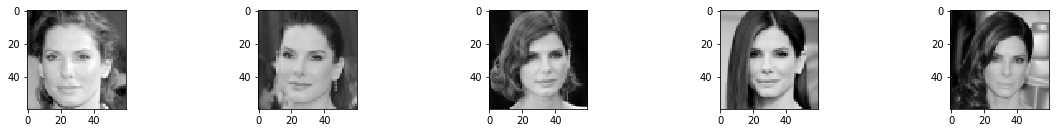

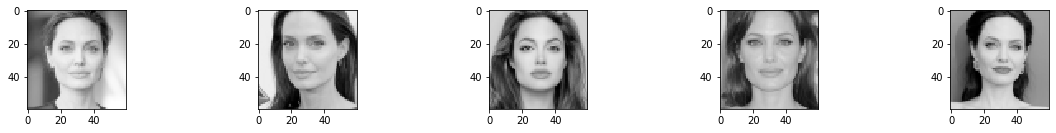

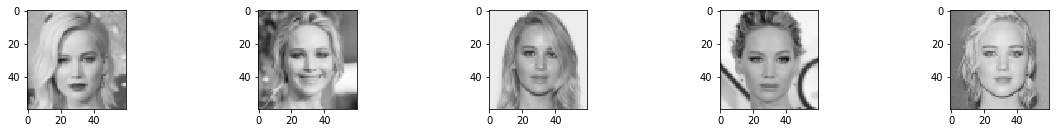

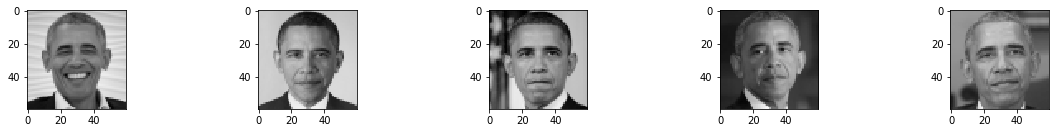

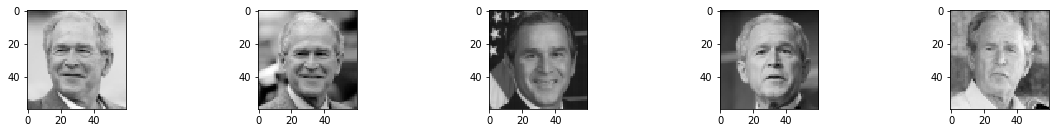

In [2]:
# Plot
subplot(sandra)
subplot(angelina)
subplot(jennifer)
subplot(obama)
subplot(bush)
plt.show()

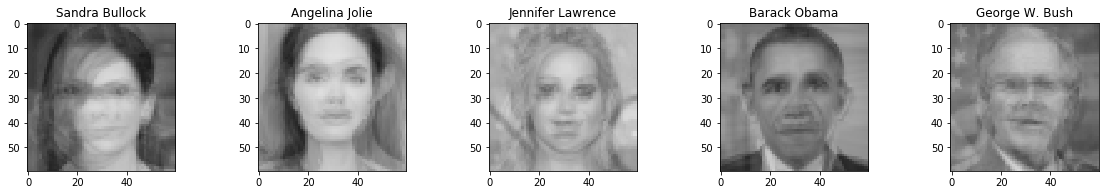

In [3]:
media_s = img_media(sandra)
media_a = img_media(angelina)
media_j = img_media(jennifer)
media_o = img_media(obama)
media_b = img_media(bush)

media_s_r = img_media_reshape(sandra, media_s)
media_a_r = img_media_reshape(angelina, media_a)
media_j_r = img_media_reshape(jennifer, media_j)
media_o_r = img_media_reshape(obama, media_o)
media_b_r = img_media_reshape(bush, media_b)

medias = []
medias.append(media_s_r)
medias.append(media_a_r)
medias.append(media_j_r)
medias.append(media_o_r)
medias.append(media_b_r)
subplot_medias(medias, ("Sandra Bullock", "Angelina Jolie", "Jennifer Lawrence", "Barack Obama", "George W. Bush",))

plt.show()

In [4]:
def gen_D(db):
    D = []
    for act_i, act in enumerate(db):
        for i, img in enumerate(act):
            D.append(img.flatten())
    return np.matrix(D)

D_orig = gen_D((sandra,angelina,jennifer,obama,bush))

C = D_orig.T.dot(D_orig)
print("D:", D_orig.shape)
print("A:", C.shape)

autovalores, autovetores = np.linalg.eig(C)
idxs = np.argsort(-autovalores)
autovalores = autovalores[idxs][:25]
autovetores = autovetores[idxs][:25]

print("autovalores:", autovalores.shape, "\n", autovalores)
print("autovetores:", autovetores.shape, "\n", autovetores)

D: (25, 3600)
A: (3600, 3600)
autovalores: (25,) 
 [458915.74359611   8801.38437065   8764.39962541   8754.15975607
   8742.67247772   8712.73601578   8700.90752254   8674.18987473
   8641.81698591   8630.03344078   8614.80341104   8601.64583394
   8576.31792699   8570.13936844   8544.88851503   8540.15473565
   8520.29368949   8513.37932422   8497.12947417   8491.56249327
   8472.11288091   8452.60640557   8444.80239557   8435.89920478
   8430.43196914]
autovetores: (25, 3600) 
 [[-1.67902440e-02  3.97094902e-03 -1.10539493e-03 ... -2.15414660e-04
  -9.25026111e-06  2.36206734e-04]
 [-1.66229054e-02  5.12281898e-03  1.92995908e-02 ...  2.09781675e-02
   1.82800624e-02  2.99226898e-02]
 [-1.66713440e-02 -2.71113939e-02  3.13145072e-02 ... -1.43071831e-02
   1.78304260e-02 -1.07021216e-03]
 ...
 [-1.69422914e-02  1.61526897e-02  2.12285221e-02 ... -3.57902238e-04
   1.48113842e-02  2.81005595e-02]
 [-1.66502994e-02 -7.58469325e-03  8.71005821e-03 ... -8.08645797e-03
  -3.16623394e-02  3

[[-0.01679024 -0.00310735  0.00372602 ... -0.0224459  -0.00408006
   0.0165497 ]]
[[-0.01679024]
 [-0.01662291]
 [-0.01667134]
 ...
 [-0.01678285]
 [-0.01640886]
 [-0.01651652]]


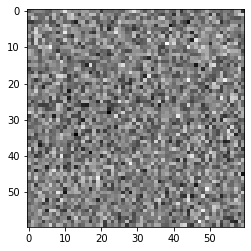

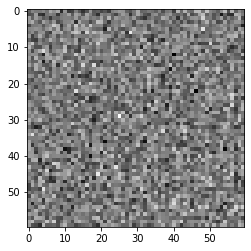

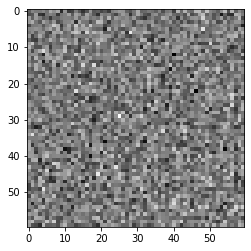

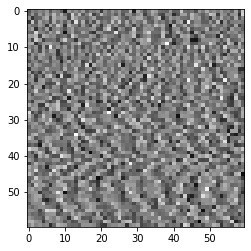

In [18]:
#u,s,v = np.linalg.svd(A)
#print(u.shape,s.shape,v.shape)

# PROJECOES
#proj_s = eigenface = media_s.dot(autovetores.T).astype(np.uint8)
#proj_a = np.reshape(media_a * autovalores.T, (IMG_WIDTH, IMG_HEIGHT)).astype(np.uint8)
#proj_j = np.reshape(media_j * autovalores.T, (IMG_WIDTH, IMG_HEIGHT)).astype(np.uint8)
#proj_b = np.reshape(media_b * autovalores.T, (IMG_WIDTH, IMG_HEIGHT)).astype(np.uint8)
#proj_b = np.reshape(media_b * autovalores.T, (IMG_WIDTH, IMG_HEIGHT)).astype(np.uint8)
#import sys
#np.set_printoptions(threshold=sys.maxsize)
face = autovetores[0].reshape((60,60))
nface = (face - np.min(face)) / np.ptp(face)
nface = nface * 255
print(u[0])
print(u[:,0])
# face autovetores
plt.figure()
plt.imshow(u[0].reshape((60,60)), cmap=plt.cm.gray)
plt.show()
plt.figure()
plt.imshow(u[:,0].reshape((60,60)), cmap=plt.cm.gray)
plt.show()
plt.figure()
plt.imshow(v[0].reshape((60,60)), cmap=plt.cm.gray)
plt.show()
plt.figure()
plt.imshow(v[:,0].reshape((60,60)), cmap=plt.cm.gray)
plt.show()

#print(nface.astype(np.uint8))
#print(np.linalg.norm(.astype(np.uint8))

#M1 = sandra[0].reshape((1,3600)).T # 1 col 3600 linhas
#M2 = autovetores.T # 1 linha 3600 colunas
#print(M1.shape)
#print(M2.shape)
#print(M1)
#print(M2)
#mul = np.matmul(M1, M2)
#mul = np.matmul(M2, M1)
#print(M1.shape, M2.shape, mul.shape)
#mul_r = mul.reshape((60,60)).astype(np.uint8)
#print(mul_r.shape)
#proj_s = media_s.reshape((1,3600)).dot()
#print(VT[:5,:].shape)

#print(mul_r)
#medias = []
#medias.append(mul_r)
#medias.append(proj_a)
#medias.append(proj_j)
#medias.append(proj_b)
#medias.append(proj_b)
#subplot_medias(medias, ("Sandra Bullock", "Angelina Jolie", "Jennifer Lawrence", "Barack Obama", "George W. Bush",))

#plt.show()
#print(proj_s.shape)
#print(proj_s[:25])

(5,)


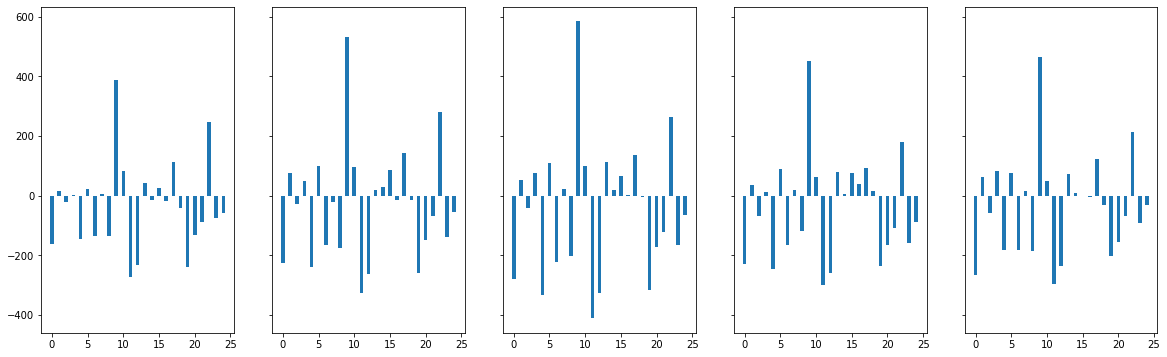

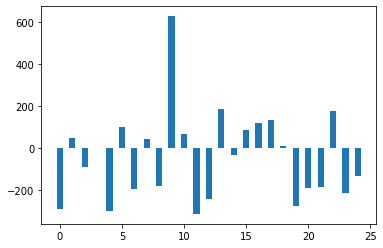

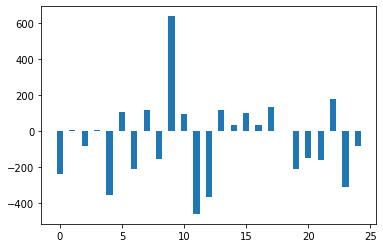

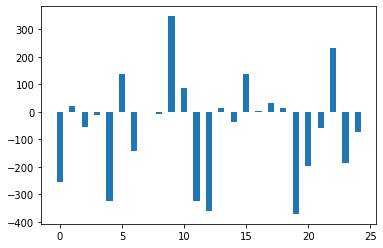

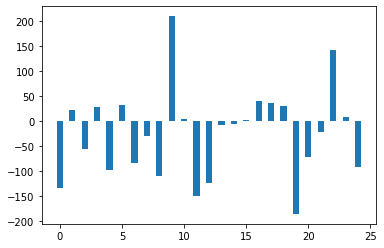

In [6]:
#eigenface = autovetores[:,0].reshape((60,60))
#eigenface = np.matmul(sandra[0], eigenface.T)
#eigenface = sandra[0].dot(eigenface)
#eigenface = sandra[0].flatten().dot(autovetores[:,0])

#print(autovetores[:,24].reshape((1,3600)).shape)
def plot_proj(proj, idx, axs):
    proj_1d = np.asarray(proj)[0]
    # fig
    if (axs is None):
        fig, axs = plt.subplots()
    index = np.arange(len(proj_1d))
    bar_width = 0.5
    rects1 = axs.bar(index, proj_1d, bar_width)

def plot_proj_img(img):
    proj = img.flatten().dot(autovetores.T)
    plot_proj(proj, 0, None)

def plot_proj_imgs(imgs):
    f, axs = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(20,6))
    print(axs.shape)
    for i, img in enumerate(imgs):
        proj = img.flatten().dot(autovetores.T)
        plot_proj(proj, i, axs[i])


plot_proj_imgs((media_s,media_a,media_j,media_o,media_b))
plot_proj_img(obama[0])
plot_proj_img(obama[1])
plot_proj_img(obama[2])
plot_proj_img(obama[3])



In [7]:
aval = np.array([8,1,3,7,2])
avec = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12],
    [13,14,15]
])
idxs = np.argsort(-aval)
aval = aval[idxs]
avec = avec[idxs]